<a href="https://colab.research.google.com/github/TruthSeekerBeast/Deep-learning-colabs/blob/master/MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step by step deep learning

In [0]:
# Import all necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
print(tf.__version__)

In [0]:
# Constants that to be used for various purpose in cells
normalized = False

In [0]:
# dataset is available from tf keras dataset module
raw_data = tf.keras.datasets.fashion_mnist.load_data()

In [0]:
# Simple lambda to print type of any object
typeof = lambda what:print(type(what))

In [0]:
# Here, load_data() function will load actual data from wrapper object
typeof(raw_data)

<class 'tuple'>


In [0]:
# Checking shape of data, It will be train/test split tuple object
np.shape(raw_data)

(2, 2)

In [0]:
# The dataset coming from Keras is a tuple with (2,2) dimensions
# So, unpacked them in train/test variables
(train_images, train_labels),(test_images, test_labels) = raw_data

9


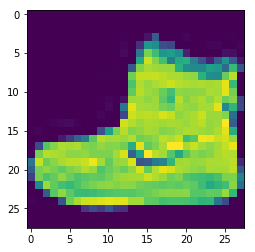

In [0]:
# Check image from training dataset
plt.imshow(train_images[0])
print(train_labels[0])

9


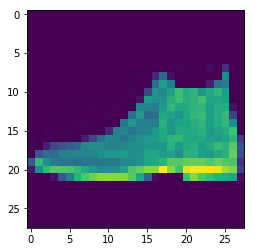

In [0]:
# Check image from training dataset
plt.imshow(test_images[0])
print(test_labels[0])

In [0]:
# Normalizing the data so that model will run faster then normalized values,
# Normalization simply means scale values to lower values in specified range.

# NOTE : To be executed only ones
if not normalized:
  print("Normalizing data")
  train_images = train_images/255.0
  test_images = test_images/255.0
  normalized = True

Normalizing


In [0]:
# Input layer is flatten as we are taking 28*28 pixels image and will provide 
# values as list/Vector to Model => 784 neurons 

# NOTE: Layers MODEULE TO BE USED FOR ALL KINDS OF LAYERS
input_layer = tf.keras.layers.Flatten()

# This hidden layer contains Relu activation that will be useful for loss function mechanism
hidden = tf.keras.layers.Dense(128,activation=tf.nn.relu)

# 0-9 values to be classified. so, 10 neurons in last layer, 
# Also remember to use softmax for classification in last layer, 
# It will provide value which has Highest probability value
output = tf.keras.layers.Dense(10, activation= tf.nn.softmax)

In [0]:
# First, create a model, Here, we are just taking simple Sequential layers of densly connected layers
model = tf.keras.models.Sequential([input_layer, 
                                    hidden, 
                                    output])

In [0]:
""" After creating a model we should provide optimizer function and Loss functions to model
Loss function  for classification of images is sparse_categorical_crossentropy.
When you provide metrics the output while training will show accuracy value.
"""
model.compile(optimizer= tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
# Training the model by calling fit method on training data, epochs : Iterations
trained = model.fit(train_images, train_labels, epochs= 5)

Epoch 1/5
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2794 - acc: 0.8965
Epoch 2/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2667 - acc: 0.9014
Epoch 3/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2553 - acc: 0.9039
Epoch 4/5
60000/60000 [==============================] - 4s 70us/sample - loss: 0.2450 - acc: 0.9087
Epoch 5/5
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2380 - acc: 0.9109


In [0]:
# Evaluating the model after training on test data
evaluated = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.3452 - acc: 0.8789


# Some test cases of how different changes affect the process of learning

### Adding more neaurons to hidden layer

Let's increase number of neurons in dense layer. Let's take it to 1024 and check in which aspect it affecting?

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.14.0
11493376/11490434 [==============================] - 0s 0us/step


W0809 14:10:45.660234 139673923364736 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/5
60000/60000 [==============================] - 14s 242us/sample - loss: 0.1849
Epoch 2/5
60000/60000 [==============================] - 14s 234us/sample - loss: 0.0729
Epoch 3/5
60000/60000 [==============================] - 14s 235us/sample - loss: 0.0483
Epoch 4/5
60000/60000 [==============================] - 13s 225us/sample - loss: 0.0335
Epoch 5/5
10000/10000 [==============================] - 1s 83us/sample - loss: 0.0850
[3.2007832e-09 2.8614155e-08 8.3545215e-10 3.6170080e-05 6.5559936e-12
 1.9330512e-10 5.4370848e-14 9.9996316e-01 1.2101168e-08 7.6042346e-07]
7


**by adding more Neurons we have to do more calculations, slowing down the process, but in this case they have a good impact -- we do get more accurate. That doesn't mean it's always a case of 'more is better', you can hit the law of diminishing returns very quickly!**

### Removing the flatten layer

Reoving the flatten layer entirely

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.14.0
Epoch 1/5


InvalidArgumentError: ignored

**Will raise InvalidArgumentError as the size of input must match shape of input layer**

### changing output layer size

**Will raise same error as above, We need to match the dimension of output layer to actual length of neurons**

### Adding more layers with neurons

Consider the effects of additional layers in the network. What will happen if you add another layer between the one with 512 and the final layer with 10.

In [0]:
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu), # this layer was already there
                                    tf.keras.layers.Dense(256, activation=tf.nn.relu), # Added one more densely connected layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # last as it is

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

1.14.0
Epoch 1/5
60000/60000 [==============================] - 11s 181us/sample - loss: 0.1852
Epoch 2/5
60000/60000 [==============================] - 11s 179us/sample - loss: 0.0787
Epoch 3/5
60000/60000 [==============================] - 10s 169us/sample - loss: 0.0535
Epoch 4/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.0416
Epoch 5/5
10000/10000 [==============================] - 1s 67us/sample - loss: 0.0783
[6.7294708e-09 8.7303613e-07 8.2483451e-09 1.8205746e-07 2.3383786e-08
 2.4966120e-09 5.6547106e-13 9.9996495e-01 8.3613632e-09 3.3922239e-05]
7


**There isn't a significant impact -- because this is relatively simple data. For far more complex data (including color images to be classified as flowers that you'll see in the next lesson), extra layers are often necessary.**

### Training with more epochs

Consider the impact of training for more or less epochs. Why do you think that would be the case? 

Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
Try 30 epochs -- you might see the loss value stops decreasing, and sometimes increases. This is a side effect of something called 'overfitting' which you can learn about [somewhere] and it's something you need to keep an eye out for when training neural networks. There's no point in wasting your time training if you aren't improving your loss, right! :)

In [0]:
#@title
import tensorflow as tf
print(tf.__version__)

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(5, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

### Callbacks

Earlier when you trained for extra epochs you had an issue where your loss might change. It might have taken a bit of time for you to wait for the training to do that, and you might have thought 'wouldn't it be nice if I could stop the training when I reach a desired value?' -- i.e. 95% accuracy might be enough for you, and if you reach that after 3 epochs, why sit around waiting for it to finish a lot more epochs....So how would you fix that? Like any other program...you have callbacks! Let's see them in action...

In [0]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])




1.14.0
4423680/4422102 [==============================] - 0s 0us/step
Epoch 1/5
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4740
Epoch 2/5
59776/60000 [============================>.] - ETA: 0s - loss: 0.3611
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 7s 118us/sample - loss: 0.3608
